In [1]:
import os
from astropy import *
import numpy as np
import math as math
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.optimize import curve_fit

In [2]:
import pandas as pd

In [3]:
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4

we used a gaussian to fit in fxcor to the cross corellation function 
gaussian works well for our case, since the core of the profile is guassian

In [4]:
line_6678 = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/6678velocity.txt',sep=' ')
line_Halpha = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/Halphavelocities.txt',sep=' ')
line_H2O = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/H20velocity.txt',sep=' ')
line_O2 = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/02velocity.txt',sep=' ') #O2 not zero because of the spectral graph shift
HJD = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/HJD.txt',sep=' ')

In [5]:
RV_O2 = line_6678['Vr'] - line_O2['Vr'] #O2 corrected radial velocity - residuals decrease with this correction
RV_H2O = line_6678['Vr'] - line_H2O['Vr'] #H2O corrected radial velocity - residuals decrease with this correction
RV_both = line_6678['Vr'] - ( line_O2['Vr'] + line_H2O['Vr'])/2 # corrected radial velocity - residuals decrease with this correction
times = [ i - 2458054 for i in HJD['HJD'] ] #Times relative to 2458054

# He - 6678

# No corrections

### Fit with No Corrections

In [6]:
popt, pcov = curve_fit(orbit, times, line_6678['Vr'] , p0=(18.1,0.2,0.03,-2.5))
p1_no = popt[0] #Amplitude
p2_no = popt[1] # phase
p3_no = popt[2] # Gives period 
p4_no = popt[3] # zero point 

xx =np.linspace(0.55, 1., 256, endpoint=True)
c_no = p1_no*np.sin((xx-p2_no)/p3_no)+p4_no

residuals_no = line_6678['Vr'] - orbit(times,p1_no,p2_no,p3_no,p4_no)
n=15
fres_no = math.sqrt(sum(residuals_no**2)/n)

print("Amplitude =", '%.5f' % p1_no, "km/s")
print("Phase =", '%.4f' % p2_no, "days")
print("Zero Point =", '%.2f' % p4_no, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_no)  ))
print("Residual", '%.5f' % fres_no, "km/s")

Amplitude = 17.97840 km/s
Phase = 0.1352 days
Zero Point = -1.87 km/s
Period = 0.190837 days
Residual 0.51485 km/s


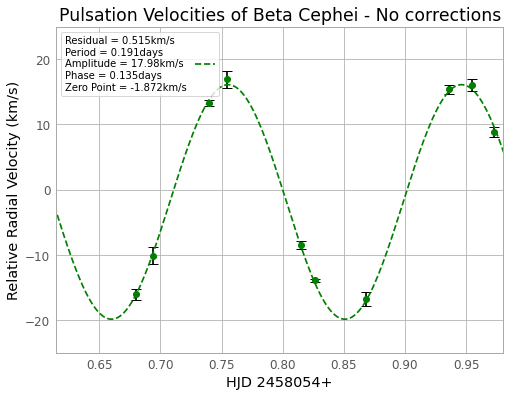

In [7]:
## No Corrections
plt.errorbar(times,line_6678['Vr'],yerr = line_6678['dVr'],fmt ='none',capsize = 5,ecolor='black')
plt.plot(times, line_6678['Vr'] , 'go')
plt.plot(xx,c_no,'--',color='green',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_no,3),round( (2*np.pi)*(p3_no),3),round(p1_no,2),\
                                              round(p2_no,3),round(p4_no,3)) )

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - No corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 25])
plt.legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

# Oxygen Correction - oxygen lines are from the atmosphere

Does the oxygen correction imporve things?
Does the correction degrade the signal by adding noise? Or is correcting better?

we noitice the residuals are a little lower after the correction - so thats an improvement 

In [146]:
popt, pcov = curve_fit(orbit, times, RV_O2, p0=(18.1,0.2,0.03,-2.5))
p1_O2 = popt[0] #Amplitude
p2_O2 = popt[1] # phase
p3_O2 = popt[2] # Gives period 
p4_O2 = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_O2 = p1_O2*np.sin((xx-p2_O2)/p3_O2)+p4_O2

residuals_O2 = RV_O2 - orbit(times,p1_O2,p2_O2,p3_O2,p4_O2)
n=15
fres_O2 = math.sqrt(sum(residuals_O2**2)/n)

print("Amplitude =", '%.5f' % p1_O2, "km/s")
print("Phase =", '%.5f' % p2_O2, "days")
print("Zero Point =", '%.5f' % p4_O2, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_O2)  ))
print("Residual", '%.5f' % fres_O2, "km/s")

Amplitude = 17.93903 km/s
Phase = 0.13574 days
Zero Point = -1.87005 km/s
Period = 0.190649 days
Residual 0.45053 km/s


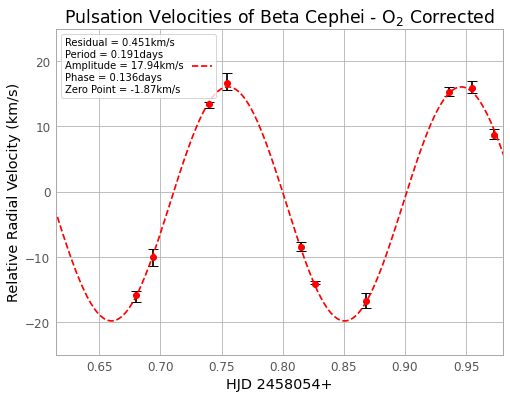

In [9]:
##O2 Corrections
err = np.sqrt( line_6678['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 

plt.errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

plt.plot(times, RV_O2 ,'ro')
plt.plot(xx,c_O2,'--',color='red',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_O2,3),round( (2*np.pi)*(p3_O2),3),round(p1_O2,2),\
                                              round(p2_O2,3),round(p4_O2,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - O$_2$ Corrected')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 25])
plt.legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)

plt.show()

#plt.savefig('tst.png')

# Water Vapour Lines - also from the atmosphere

In [10]:
popt, pcov = curve_fit(orbit, times, RV_H2O, p0=(18.1,0.2,0.03,-2.5))
p1_H2O = popt[0] #Amplitude
p2_H2O = popt[1] # phase
p3_H2O = popt[2] # Gives period 
p4_H2O = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_H2O = p1_H2O*np.sin((xx-p2_H2O)/p3_H2O)+p4_H2O

residuals_H2O = RV_H2O - orbit(times,p1_H2O,p2_H2O,p3_H2O,p4_H2O)
n=15
fres_H2O = math.sqrt(sum(residuals_H2O**2)/n)

print("Amplitude =", '%.5f' % p1_H2O, "km/s")
print("Phase =", '%.4f' % p2_H2O, "days")
print("Zero Point =", '%.2f' % p4_H2O, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_H2O)  ))
print("Residual", '%.5f' % fres_H2O, "km/s")

Amplitude = 17.93577 km/s
Phase = 0.1353 days
Zero Point = -1.84 km/s
Period = 0.190749 days
Residual 0.52276 km/s


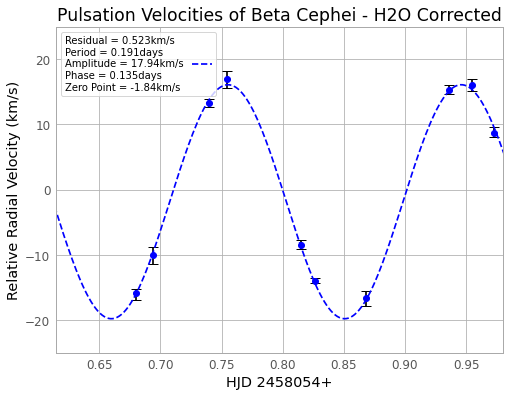

In [11]:
##H2O Corrections
err = np.sqrt( line_6678['dVr']**2 + line_H2O['dVr']**2 ) #quadratically addign uncertainity from each 

plt.errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

plt.plot(times, RV_H2O ,'bo')
plt.plot(xx,c_H2O,'--',color='blue',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_H2O,3),round( (2*np.pi)*(p3_H2O),3),round(p1_H2O,2),\
                                              round(p2_H2O,3),round(p4_H2O,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - H2O Corrected')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 25])
plt.legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)

plt.show()

#plt.savefig('tst.png')

# O2 and H2O Corrections

In [12]:
popt, pcov = curve_fit(orbit, times, RV_both, p0=(18.1,0.2,0.03,-2.5))
p1_both = popt[0] #Amplitude
p2_both = popt[1] # phase
p3_both = popt[2] # Gives period 
p4_both = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_both = p1_both*np.sin((xx-p2_both)/p3_both)+p4_both

residuals_both = RV_both - orbit(times,p1_both,p2_both,p3_both,p4_both)
n=15
fres_both = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_both, "km/s")
print("Phase =", '%.4f' % p2_both, "days")
print("Zero Point =", '%.2f' % p4_both, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_both)  ))
print("Residual", '%.5f' % fres_both, "km/s")

Amplitude = 17.93738 km/s
Phase = 0.1355 days
Zero Point = -1.86 km/s
Period = 0.190699 days
Residual 0.48423 km/s


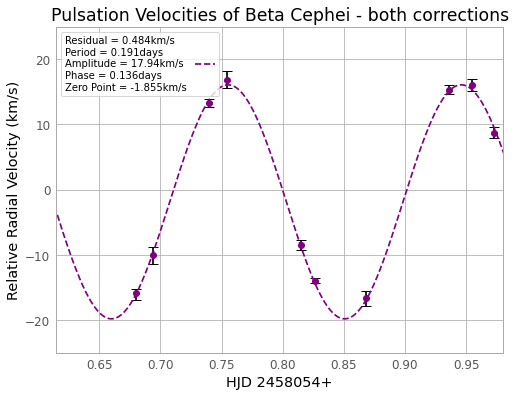

In [13]:
## Both Corrections
err = np.sqrt( line_6678['dVr']**2 + line_H2O['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
plt.errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

plt.plot(times, RV_both ,'o',color='purple')
plt.plot(xx,c_both,'--',color='purple',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_both,3),round( (2*np.pi)*(p3_both),3),round(p1_both,2),\
                                              round(p2_both,3),round(p4_both,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - both corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 25])
plt.legend(loc = 2,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

### One plot to rule them all

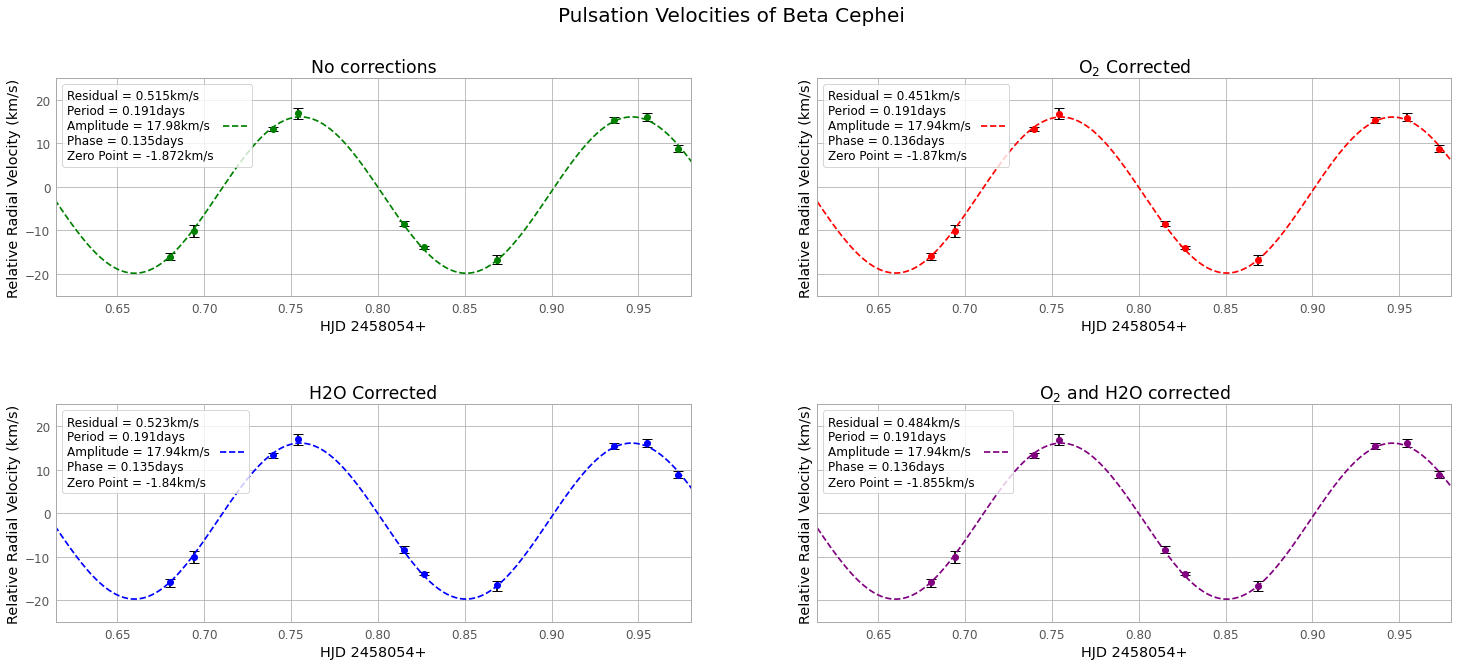

In [14]:
f, axs = plt.subplots(2, 2,figsize=(25,10), sharey=True)
f.suptitle('Pulsation Velocities of Beta Cephei',fontsize='20')

axs[0,0].errorbar(times,line_6678['Vr'],yerr = line_6678['dVr'],fmt ='none',capsize = 5,ecolor='black')
axs[0,0].plot(times, line_6678['Vr'] , 'go')
axs[0,0].plot(xx,c_no,'--',color='green',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_no,3),round( (2*np.pi)*(p3_no),3),round(p1_no,2),\
                                              round(p2_no,3),round(p4_no,3)) )

axs[0,0].set_xlabel('HJD 2458054+')
axs[0,0].set_ylabel('Relative Radial Velocity (km/s)')
axs[0,0].set_title('No corrections')
axs[0,0].grid(True)
axs[0,0].axis([0.615, 0.98, -25, 25])
axs[0,0].legend(loc = 2,markerfirst = False,framealpha = 0.8)

# ----------- UPPER RIGHT - O2 CORRECTIONS
err = np.sqrt( line_6678['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
axs[0,1].errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')
axs[0,1].plot(times, RV_O2 ,'ro')
axs[0,1].plot(xx,c_O2,'--',color='red',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_O2,3),round( (2*np.pi)*(p3_O2),3),round(p1_O2,2),\
                                              round(p2_O2,3),round(p4_O2,3)))
axs[0,1].set_xlabel('HJD 2458054+')
axs[0,1].set_ylabel('Relative Radial Velocity (km/s)')
axs[0,1].set_title('O$_2$ Corrected')
axs[0,1].grid(True)
axs[0,1].axis([0.615, 0.98, -25, 25])
axs[0,1].legend(loc = 2,markerfirst = False,framealpha = 0.8)


# ----------- LOWER Let - H2O CORRECTIONS
err = np.sqrt( line_6678['dVr']**2 + line_H2O['dVr']**2 ) #quadratically addign uncertainity from each 
axs[1,0].errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')
axs[1,0].plot(times, RV_H2O ,'bo')
axs[1,0].plot(xx,c_H2O,'--',color='blue',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_H2O,3),round( (2*np.pi)*(p3_H2O),3),round(p1_H2O,2),\
                                              round(p2_H2O,3),round(p4_H2O,3)))
axs[1,0].set_xlabel('HJD 2458054+')
axs[1,0].set_ylabel('Relative Radial Velocity (km/s)')
axs[1,0].set_title('H2O Corrected')
axs[1,0].grid(True)
axs[1,0].axis([0.615, 0.98, -25, 25])
axs[1,0].legend(loc = 2,markerfirst = False,framealpha = 0.8)

# ----------- LOWER RIGHT - BOTH CORRECTIONS
err = np.sqrt( line_6678['dVr']**2 + line_H2O['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
axs[1,1].errorbar(times,line_6678['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

axs[1,1].plot(times, RV_both ,'o',color='purple')
axs[1,1].plot(xx,c_both,'--',color='purple',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_both,3),round( (2*np.pi)*(p3_both),3),round(p1_both,2),\
                                              round(p2_both,3),round(p4_both,3)))

axs[1,1].set_xlabel('HJD 2458054+')
axs[1,1].set_ylabel('Relative Radial Velocity (km/s)')
axs[1,1].set_title('O$_2$ and H2O corrected')
axs[1,1].grid(True)
axs[1,1].axis([0.615, 0.98, -25, 25])
axs[1,1].legend(loc = 2,markerfirst = False,framealpha = 0.8)

plt.savefig('Betcep RV.png')

# H-Alpha

## No corrections

In [15]:
popt, pcov = curve_fit(orbit, times, line_Halpha['Vr'], p0=(18.1,0.2,0.03,-2.5))
p1_Ha_no = popt[0] #Amplitude
p2_Ha_no = popt[1] # phase
p3_Ha_no = popt[2] # Gives period 
p4_Ha_no = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_Ha_no = p1_Ha_no*np.sin((xx-p2_Ha_no)/p3_Ha_no)+p4_Ha_no

residuals_Ha_no = line_Halpha['Vr'] - orbit(times,p1_Ha_no,p2_Ha_no,p3_Ha_no,p4_Ha_no)
n=15
fres_Ha_no = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_Ha_no, "km/s")
print("Phase =", '%.4f' % p2_Ha_no, "days")
print("Zero Point =", '%.2f' % p4_Ha_no, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_Ha_no)  ))
print("Residual", '%.5f' % fres_Ha_no, "km/s")

Amplitude = -2.08305 km/s
Phase = 0.2671 days
Zero Point = -0.38 km/s
Period = 0.175738 days
Residual 0.48423 km/s


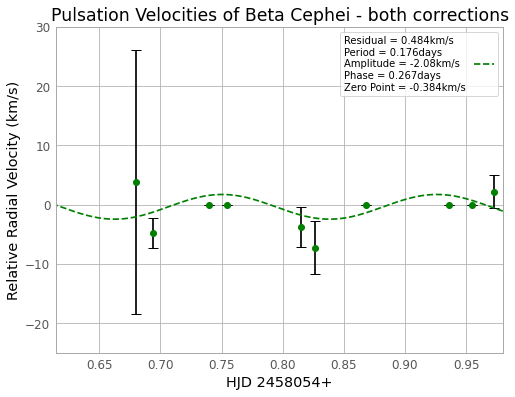

In [16]:
err = np.sqrt( line_Halpha['dVr']**2) #quadratically addign uncertainity from each 
plt.errorbar(times,line_Halpha['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

clr = 'green'
plt.plot(times, line_Halpha['Vr'] ,'o',color=clr)
plt.plot(xx,c_Ha_no,'--',color=clr,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_no,3),round( (2*np.pi)*(p3_Ha_no),3),round(p1_Ha_no,2),\
                                              round(p2_Ha_no,3),round(p4_Ha_no,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - both corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 30])
plt.legend(loc = 1,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

## O2 corrections

In [17]:
popt, pcov = curve_fit(orbit, times, line_Halpha['Vr']-line_O2['Vr'], p0=(18.1,0.2,0.03,-2.5))
p1_Ha_O2 = popt[0] #Amplitude
p2_Ha_O2 = popt[1] # phase
p3_Ha_O2 = popt[2] # Gives period 
p4_Ha_O2 = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_Ha_O2 = p1_Ha_O2*np.sin((xx-p2_Ha_O2)/p3_Ha_O2)+p4_Ha_O2

residuals_Ha_O2 = (line_Halpha['Vr']-line_O2['Vr']) - orbit(times,p1_Ha_O2,p2_Ha_O2,p3_Ha_O2,p4_Ha_O2)
n=15
fres_Ha_O2 = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_Ha_O2, "km/s")
print("Phase =", '%.4f' % p2_Ha_O2, "days")
print("Zero Point =", '%.2f' % p4_Ha_O2, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_Ha_O2)  ))
print("Residual", '%.5f' % fres_Ha_O2, "km/s")

Amplitude = -2.08950 km/s
Phase = 0.2697 days
Zero Point = -0.37 km/s
Period = 0.174382 days
Residual 0.48423 km/s


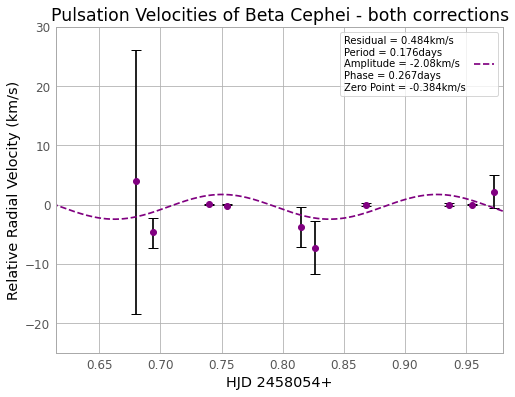

In [18]:
err = np.sqrt( line_Halpha['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
plt.errorbar(times,line_Halpha['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

clr = 'purple'
plt.plot(times, line_Halpha['Vr']-line_O2['Vr'] ,'o',color=clr)
plt.plot(xx,c_Ha_no,'--',color=clr,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_no,3),round( (2*np.pi)*(p3_Ha_no),3),round(p1_Ha_no,2),\
                                              round(p2_Ha_no,3),round(p4_Ha_no,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - both corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 30])
plt.legend(loc = 1,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

## H20 Corrections

In [19]:
popt, pcov = curve_fit(orbit, times, line_Halpha['Vr']-line_H2O['Vr'], p0=(18.1,0.2,0.03,-2.5))
p1_Ha_H2O = popt[0] #Amplitude
p2_Ha_H2O = popt[1] # phase
p3_Ha_H2O = popt[2] # Gives period 
p4_Ha_H2O = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_Ha_H2O = p1_Ha_H2O*np.sin((xx-p2_Ha_H2O)/p3_Ha_H2O)+p4_Ha_H2O

residuals_Ha_H2O = (line_Halpha['Vr']-line_H2O['Vr']) - orbit(times,p1_Ha_H2O,p2_Ha_H2O,p3_Ha_H2O,p4_Ha_H2O)
n=15
fres_Ha_H2O = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_Ha_H2O, "km/s")
print("Phase =", '%.4f' % p2_Ha_H2O, "days")
print("Zero Point =", '%.2f' % p4_Ha_H2O, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_Ha_H2O)  ))
print("Residual", '%.5f' % fres_Ha_H2O, "km/s")

Amplitude = -2.07223 km/s
Phase = 0.2686 days
Zero Point = -0.34 km/s
Period = 0.174755 days
Residual 0.48423 km/s


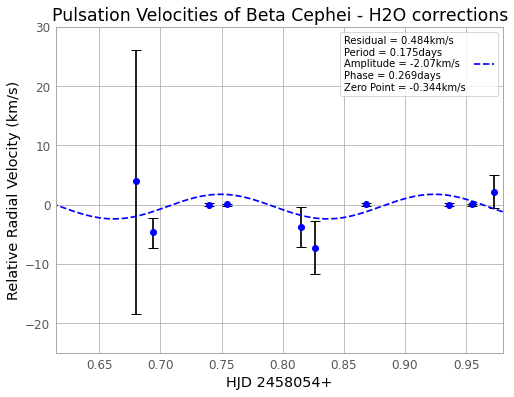

In [20]:
err = np.sqrt( line_Halpha['dVr']**2 + line_H2O['dVr']**2 ) #quadratically addign uncertainity from each 
plt.errorbar(times,line_Halpha['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')

clr = 'blue'
plt.plot(times, line_Halpha['Vr']-line_H2O['Vr'] ,'o',color=clr)
plt.plot(xx,c_Ha_H2O,'--',color=clr,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_H2O,3),round( (2*np.pi)*(p3_Ha_H2O),3),round(p1_Ha_H2O,2),\
                                              round(p2_Ha_H2O,3),round(p4_Ha_H2O,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - H2O corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 30])
plt.legend(loc = 1,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

## Both Corrections

In [21]:
popt, pcov = curve_fit(orbit, times, line_Halpha['Vr']- 0.5*( line_H2O['Vr'] + line_O2['Vr'] ), p0=(18.1,0.2,0.03,-2.5))
p1_Ha_both = popt[0] #Amplitude
p2_Ha_both = popt[1] # phase
p3_Ha_both = popt[2] # Gives period 
p4_Ha_both = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_Ha_both = p1_Ha_both*np.sin((xx-p2_Ha_both)/p3_Ha_both)+p4_Ha_both

residuals_Ha_both = (line_Halpha['Vr']-0.5*( line_H2O['Vr'] + line_O2['Vr'] )) - orbit(times,p1_Ha_both,p2_Ha_both,p3_Ha_both,p4_Ha_both)
n=15
fres_Ha_both = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_Ha_both, "km/s")
print("Phase =", '%.4f' % p2_Ha_both, "days")
print("Zero Point =", '%.2f' % p4_Ha_both, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_Ha_both)  ))
print("Residual", '%.5f' % fres_Ha_both, "km/s")

Amplitude = -2.08072 km/s
Phase = 0.2692 days
Zero Point = -0.36 km/s
Period = 0.174562 days
Residual 0.48423 km/s


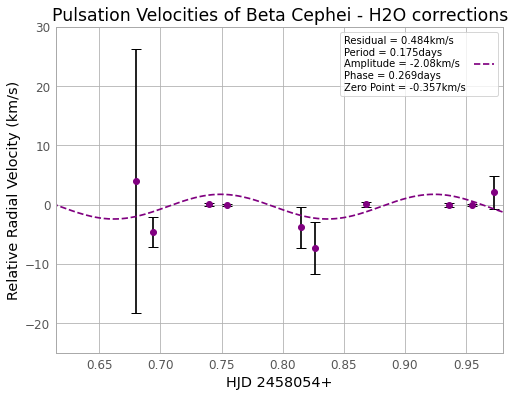

In [22]:
err = np.sqrt( line_Halpha['dVr']**2 + line_H2O['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
plt.errorbar(times,line_Halpha['Vr']- 0.5*( line_H2O['Vr'] + line_O2['Vr'] ),yerr = err,fmt ='none',capsize = 5,ecolor='black')

clr = 'purple'
plt.plot(times, line_Halpha['Vr']- 0.5*( line_H2O['Vr'] + line_O2['Vr'] ) ,'o',color=clr)
plt.plot(xx,c_Ha_both,'--',color=clr,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_both,3),round( (2*np.pi)*(p3_Ha_both),3),round(p1_Ha_both,2),\
                                              round(p2_Ha_both,3),round(p4_Ha_both,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei - H2O corrections')
plt.grid(True)
plt.axis([0.615, 0.98, -25, 30])
plt.legend(loc = 1,fontsize = 10,markerfirst = False,framealpha = 0.8)
plt.show()

#plt.savefig('tst.png')

## One graph to rule or whatever

Residual = 0.484km/s
Period = 0.176days
Amplitude = -2.08km/s
Phase = 0.267days
Zero Point = -0.384km/s
Residual = 0.484km/s
Period = 0.174days
Amplitude = -2.09km/s
Phase = 0.27days
Zero Point = -0.369km/s


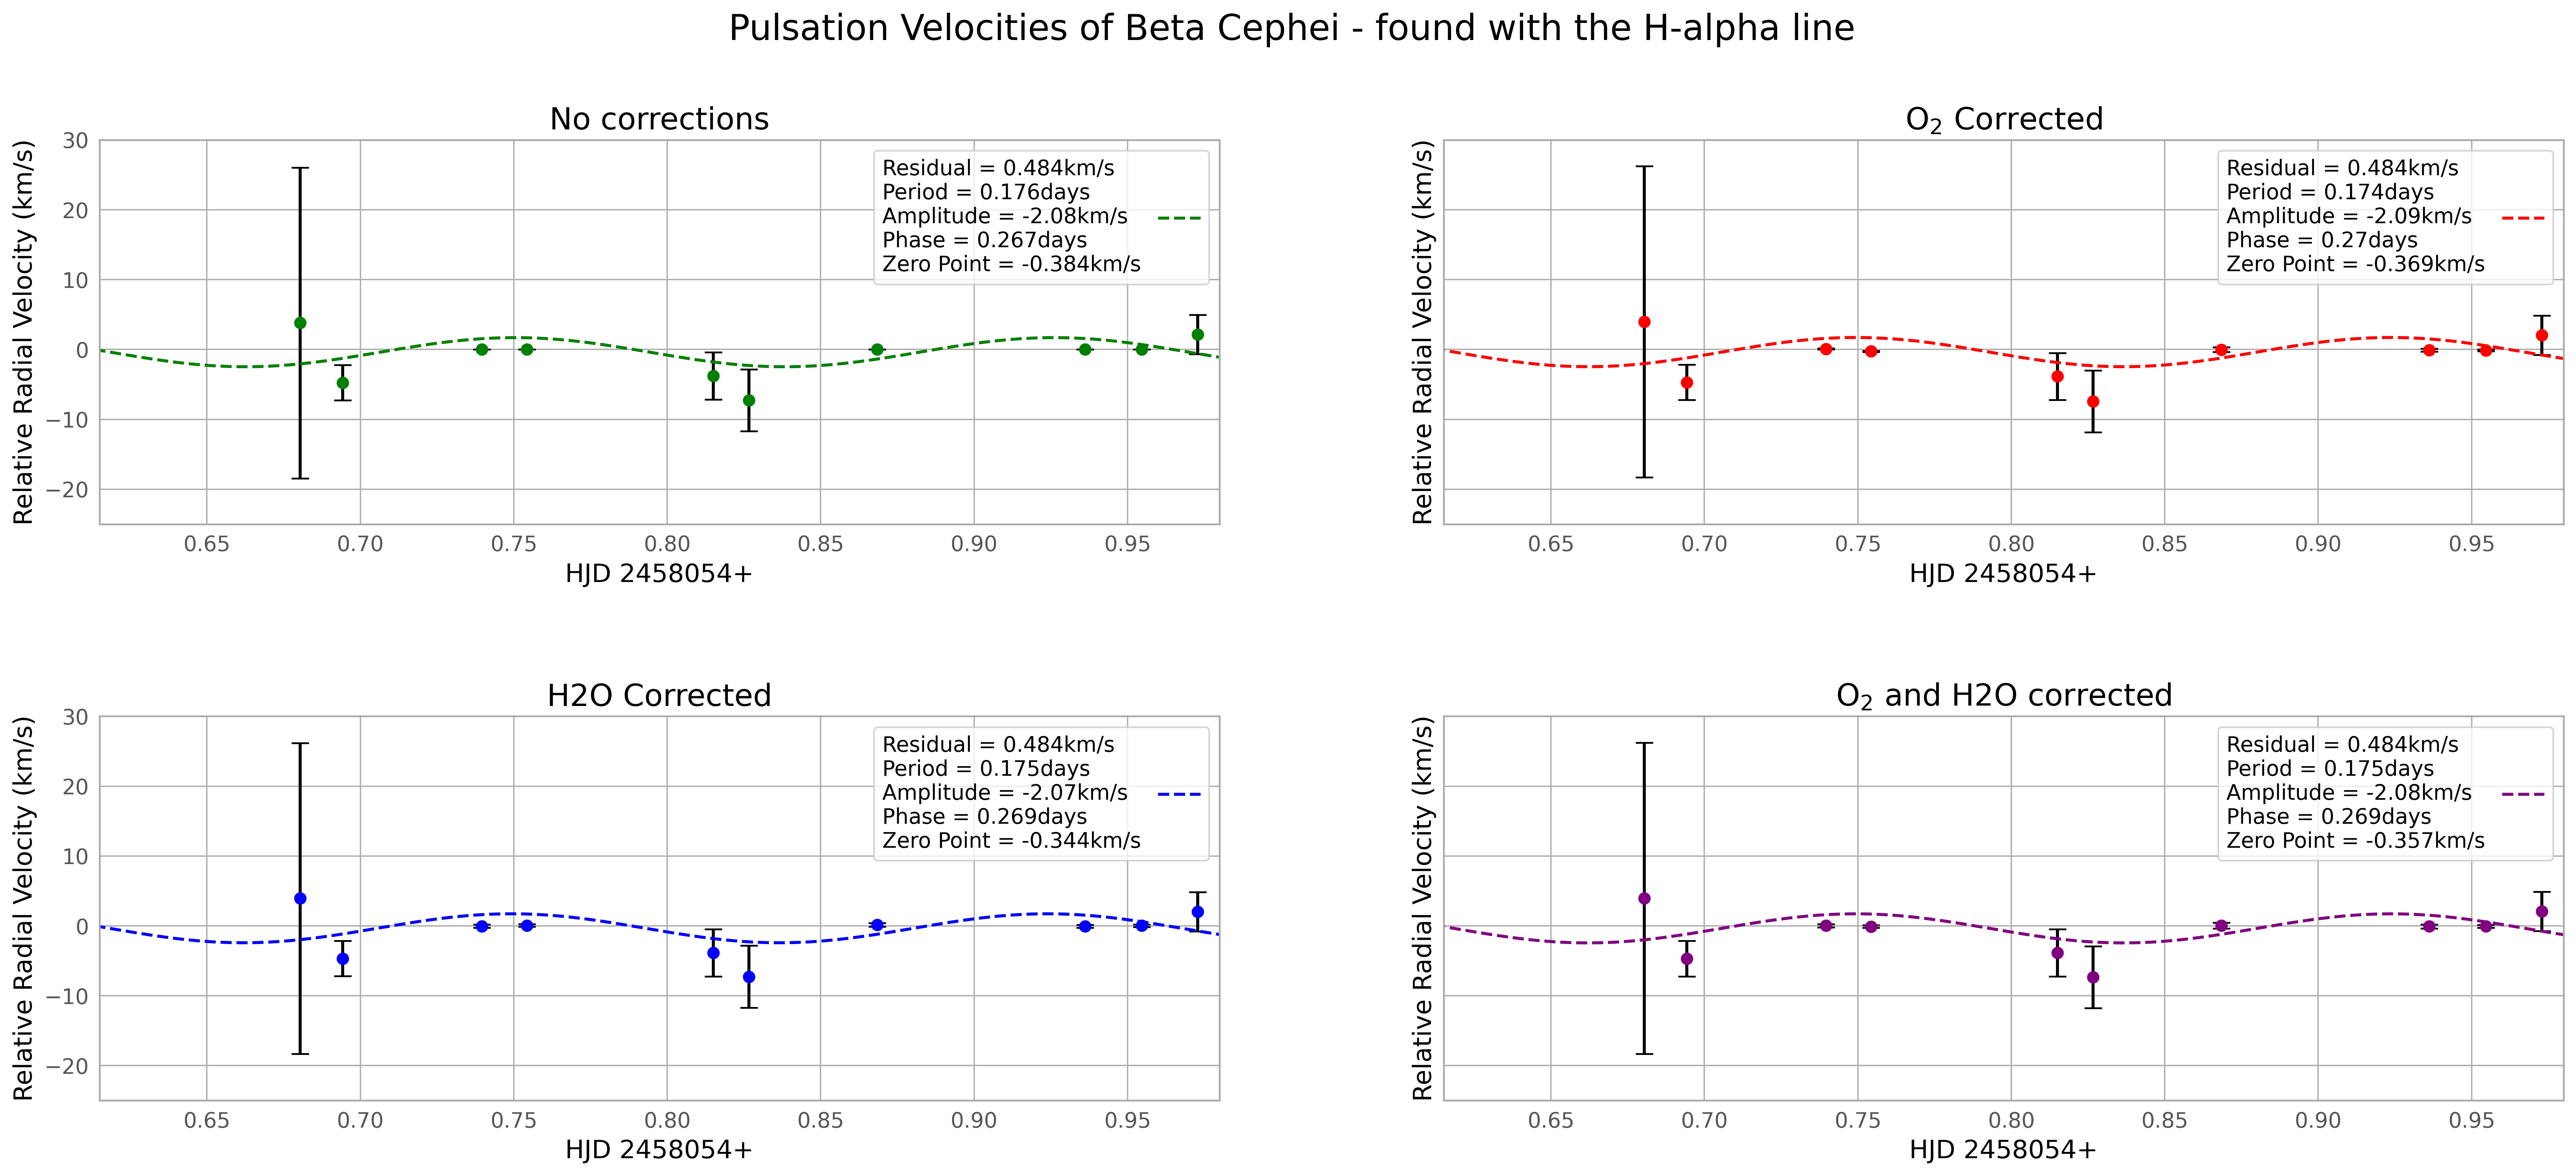

In [152]:
f, axs = plt.subplots(2, 2,figsize=(25,10), sharey=True, dpi=350)
f.suptitle('Pulsation Velocities of Beta Cephei - found with the H-alpha line',fontsize='20')

axs[0,0].errorbar(times,line_Halpha['Vr'],yerr = line_Halpha['dVr'],fmt ='none',capsize = 5,ecolor='black')
axs[0,0].plot(times, line_Halpha['Vr'] , 'go')
axs[0,0].plot(xx,c_Ha_no,'--',color='green',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_no,3),round( (2*np.pi)*(p3_Ha_no),3),round(p1_Ha_no,2),\
                                              round(p2_Ha_no,3),round(p4_Ha_no,3)) )

axs[0,0].set_xlabel('HJD 2458054+')
axs[0,0].set_ylabel('Relative Radial Velocity (km/s)')
axs[0,0].set_title('No corrections')
axs[0,0].grid(True)
axs[0,0].axis([0.615, 0.98, -25, 25])
axs[0,0].legend(loc = 1,markerfirst = False,framealpha = 0.8)

# ----------- UPPER RIGHT - O2 CORRECTIONS
err = np.sqrt( line_Halpha['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
axs[0,1].errorbar(times,line_Halpha['Vr']-line_O2['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')
axs[0,1].plot(times, line_Halpha['Vr'] - line_O2['Vr'] ,'ro')
axs[0,1].plot(xx,c_Ha_O2,'--',color='red',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_O2,3),round( (2*np.pi)*(p3_Ha_O2),3),round(p1_Ha_O2,2),\
                                              round(p2_Ha_O2,3),round(p4_Ha_O2,3)))
axs[0,1].set_xlabel('HJD 2458054+')
axs[0,1].set_ylabel('Relative Radial Velocity (km/s)')
axs[0,1].set_title('O$_2$ Corrected')
axs[0,1].grid(True)
axs[0,1].axis([0.615, 0.98, -25, 25])
axs[0,1].legend(loc = 1,markerfirst = False,framealpha = 0.8)


# ----------- LOWER Let - H2O CORRECTIONS
err = np.sqrt( line_Halpha['dVr']**2 + line_H2O['dVr']**2 ) #quadratically addign uncertainity from each 
axs[1,0].errorbar(times,line_Halpha['Vr']- line_H2O['Vr'],yerr = err,fmt ='none',capsize = 5,ecolor='black')
axs[1,0].plot(times, line_Halpha['Vr'] - line_H2O['Vr'] ,'bo')
axs[1,0].plot(xx,c_Ha_H2O,'--',color='blue',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_H2O,3),round( (2*np.pi)*(p3_Ha_H2O),3),round(p1_Ha_H2O,2),\
                                              round(p2_Ha_H2O,3),round(p4_Ha_H2O,3)))
axs[1,0].set_xlabel('HJD 2458054+')
axs[1,0].set_ylabel('Relative Radial Velocity (km/s)')
axs[1,0].set_title('H2O Corrected')
axs[1,0].grid(True)
axs[1,0].axis([0.615, 0.98, -25, 25])
axs[1,0].legend(loc = 1,markerfirst = False,framealpha = 0.8)

# ----------- LOWER RIGHT - BOTH CORRECTIONS
err = np.sqrt( line_Halpha['dVr']**2 + line_H2O['dVr']**2 + line_O2['dVr']**2 ) #quadratically addign uncertainity from each 
axs[1,1].errorbar(times,line_Halpha['Vr']- 0.5*( line_H2O['Vr'] + line_O2['Vr'] ),yerr = err,fmt ='none',capsize = 5,ecolor='black')

axs[1,1].plot(times, line_Halpha['Vr']- 0.5*( line_H2O['Vr'] + line_O2['Vr'] ) ,'o',color='purple')
axs[1,1].plot(xx,c_Ha_both,'--',color='purple',label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_both,3),round( (2*np.pi)*(p3_Ha_both),3),round(p1_Ha_both,2),\
                                              round(p2_Ha_both,3),round(p4_Ha_both,3)))

axs[1,1].set_xlabel('HJD 2458054+')
axs[1,1].set_ylabel('Relative Radial Velocity (km/s)')
axs[1,1].set_title('O$_2$ and H2O corrected')
axs[1,1].grid(True)
axs[1,1].axis([0.615, 0.98, -25, 30])
axs[1,1].legend(loc = 1,markerfirst = False,framealpha = 0.8)

#plt.savefig('Betcep RV Halpha.png')

print('Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_no,3),round( (2*np.pi)*(p3_Ha_no),3),round(p1_Ha_no,2),\
                                              round(p2_Ha_no,3),round(p4_Ha_no,3)))


print('Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_Ha_O2,3),round( (2*np.pi)*(p3_Ha_O2),3),round(p1_Ha_O2,2),\
                                              round(p2_Ha_O2,3),round(p4_Ha_O2,3)))

# Over Many Years

In [24]:
pi=3.14159265358979323846264

## 1997

In [66]:
ydata97=np.array([14.885,14.331,13.384,-1.722,-2.842,-10.261,-9.885,-1.373,-0.077,12.963,13.291,11.14,10.347,-7.979,-8.551,14.618,16.977])
xdata97=np.array([.65879,.69436,.69737,.73564,.7387,.77486,.77811,.80924,.81074,.84526,.84814,.89207,.89568,.9438,.97659,1.03845,1.06355])

yr97 = 2450715 + np.mean(xdata97)


mean97=np.mean(ydata97)
ydata97=ydata97-mean97
popt, pcov = curve_fit(orbit, xdata97, ydata97, p0=(18.0,0.1,0.03,-0.2))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata97 - orbit(xdata97,p1,p2,p3,p4)
n=17
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.50, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4

# plt.plot(xx,c)
# plt.plot(xdata97, ydata97, 'ro')
# plt.xlabel('HJD 2450715+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(.66, 15, r'1997')
# plt.axis([0.6, 1.15, -25, 25])
# plt.grid(True)
# plt.show()
rv97_offset = ydata97 + p4

per = np.multiply(2*pi,p3)
per_1997 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_1997 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")

residual = 0.439 km/s
Period = 0.189765 days
Amplitude = 13.34 km/s
Phase = 0.0598 days
Zero Point = -1.53 km/s


## 2009

In [65]:
v_r = np.array([0.159, -0.004, -0.111, -0.102, 0.376, 0.083, -0.016, 0.336, -0.25, -0.43, -0.03])
v_h = np.array([0.881, -7.560, 0.165, 13.967, 8.164, -9.141, -17.859, -3.210, 14.719, 12.920, -13.564])
v_h_err = np.array([0.453, 0.850, 0.253, 0.333, 0.588, 0.771, 0.771, 1.073, 1.018, 0.563, 0.617, 0.357])
ydata09 = v_h - v_r
xdata09 = np.array([ .64681, .66218, .74561, .77270, .82342, .85499, .88908, .92940, .96380, 1.00379, 1.05501])

yr09 = 2455101 + np.mean(xdata09)

mean09=np.mean(ydata09)
ydata09=ydata09-mean09
popt, pcov = curve_fit(orbit, xdata09, ydata09, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata09 - orbit(xdata09,p1,p2,p3,p4)
n=11
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.60, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata09,ydata09,'ro')
# plt.xlabel('HJD 2455101+')
# plt.text(.66, 15, r'2009')
# plt.axis([0.65, 1.15, -25, 25])
# plt.grid(True)
# plt.show()
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
rv09_offset = ydata09 + p4

per_=np.multiply(2*pi,p3)
per_2009 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
amp_2009 = p1
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")

residual = 0.357 km/s
Period = 0.191665 days
Amplitude = 17.78 km/s
Phase = 0.1732 days
Zero Point = -0.29 km/s


## 2014

In [64]:
ydata14=np.array([2.005,-0.055,-20.451,-9.615,4.512,12.540,14.207,7.099,
-3.088,-19.608,-12.835,-0.942,13.803,15.036,-2.801])
xdata14=np.array([.6687,.672,.7224,.76145,.7872,.80369,.8333,.84857,.87841,
.91511,.94696,.96929,.99675,1.02271,1.0581])

yr14 = 2456927 + np.mean(xdata14)


mean14=np.mean(ydata14)
ydata14=ydata14-mean14
popt, pcov = curve_fit(orbit, xdata14, ydata14, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata14 - orbit(xdata14,p1,p2,p3,p4)
n=15
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.65, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata14,ydata14,'ro')
# plt.xlabel('HJD 2456927+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(0.66, 15, r'2014')
# plt.axis([0.6, 1.15, -25, 25])
# plt.grid(True)
# plt.show()
rv14_offset = ydata14 + p4

per=np.multiply(2*pi,p3)
per_2014 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2014 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")

residual = 1.454 km/s
Period = 0.191665 days
Amplitude = 17.52 km/s
Phase = 0.1988 days
Zero Point = -2.47 km/s


## 2015

In [63]:
ydata15=np.array([-11.078,-12.631,3.011,20.002,19.094,-9.398,-13.634,-13.036,6.644,23.361,5.318,-14.184])
xdata15=np.array([0.635,0.672,0.706,0.737,0.771,0.823,0.834,0.862,0.902,0.944,0.987,1.025])
yr15 = 2457294 + np.mean(xdata15)


mean15=np.mean(ydata15)+5.5
ydata15=ydata15-mean15
popt, pcov = curve_fit(orbit, xdata15, ydata15, p0=(18.0,0.17,0.031,0))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata15 - orbit(xdata15,p1,p2,p3,p4)
n=12
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.60, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata15,ydata15,'ro')
# plt.xlabel('HJD 2457294+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.axis([0.6, 1.15, -25, 25])
# plt.grid(True)
# plt.show()
#plt.text(0.66, 15, r'2015')
rv15_offset = ydata15 + p4

per=np.multiply(2*pi,p3)
per_2015 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2015 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")

residual = 0.577 km/s
Period = 0.190292 days
Amplitude = 19.04 km/s
Phase = 0.1344 days
Zero Point = -2.41 km/s


## 2016

In [62]:
v_r = np.array([0.318, -0.147, 0.307, .284, 0.542, 0.612, 0.435, -0.084, -0.749, -1.45])
v_h = np.array([-5.661, -9.986, -15.459, 0.714, 19.924, 9.835, -12.690, -7.413, 14.805, 19.301])
xdata16 = np.array([ .14274, .15015, .17016, .22126, .26126, .30243, .38166, .39453, .43707, .45495])

yr16 = 2457649 + np.mean(xdata16)

ydata16 = v_h - v_r
mean16=np.mean(ydata16)
ydata16=ydata16-mean16
popt, pcov = curve_fit(orbit, xdata16, ydata16, p0=(18.0,0.15,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata16 - orbit(xdata16,p1,p2,p3,p4)
n=10
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.10, 0.55, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata16,ydata16,'ro')
# plt.xlabel('HJD 2457649+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(0.15, 15, r'2016')
# plt.axis([0.1, 0.5, -25, 25])
# plt.grid(True)
# plt.show()
rv16_offset = ydata16 - p4

per=np.multiply(2*pi,p3)
per_2016 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2016 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")


residual = 0.432 km/s
Period = 0.186892 days
Amplitude = -18.19 km/s
Phase = 0.1296 days
Zero Point = 0.38 km/s


## 2017

In [61]:
v_r = np.array([0.158, 0.090, -0.191, -0.120, -0.186, 0.055, 0.088, 0.218, 0.072, -0.176, 0.088, 0.00, -0.006, 0.018])
v_r_err = np.array([0.074, 0.067, 0.105, 0.237, 0.100, 0.073, 0.162, 0.210, 0.051, 0.110, 0.064, 0.143, 0.193, 0.153])
v_h = np.array([12.83, 6.23, -17.12, -11.42, 12.11, 15.80, -9.60, -14.98, -17.89, -13.47, 14.08, 14.83, 7.39, 0.06])
v_h_err = np.array([0.579, 0.290, 1.319, 0.938, 0.714, 0.827, 0.966, 0.416, 1.114, 0.221, 0.392, 0.717, 0.481, 0.285])
xdata17 = np.array([ .5830052, .59399217, .68038103, .69426991, .73958241, .75426407, .81506885, .82663134, .86844889, .88115729, 
.936152, .95467638, .97288252, .98844730])


yr17 = 2458054 + np.mean(xdata17)

ydata17 = v_h - v_r
mean17=np.mean(ydata17)
ydata17=ydata17-mean17
popt, pcov = curve_fit(orbit, xdata17, ydata17, p0=(18.0,0.15,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata17 - orbit(xdata17,p1,p2,p3,p4)
n=14
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.60, 1.0, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata17,ydata17,'ro')
# plt.xlabel('HJD 2458054+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(0.65, 15, r'2017')
# plt.axis([0.6, 1.05, -25, 25])
# plt.grid(True)
# plt.show()
rv17_offset = ydata17 + p4

per=np.multiply(2*pi,p3)
per_2017 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2017 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")


residual = 0.590 km/s
Period = 0.190600 days
Amplitude = 18.05 km/s
Phase = 0.1361 days
Zero Point = -2.97 km/s


## 2018

In [60]:
v_r = np.array([0.056, 0.009, 0.338, 0.328, 0.195, 0.155, 0.008, -0.223, -0.209, -0.613])
v_r_err = np.array([0.151, 0.128, 0.142, 0.112, 0.069, 0.061, 0.121, 0.08, 0.114, 0.216])
v_h = np.array([5.335, 0.223, -18.689, -12.786, 14.189, -1.948, -21.816, 4.756, 13.339,13.541])
v_h_err = np.array([0.501, 0.469, 0.974, 0.612, 0.473, 0.638, 0.741, 0.660, 0.520, 0.945])
ydata18 = v_h - v_r
xdata18 = np.array([ .61807837, .62869192, .66462423, .71663895, .77062149, .8231398, .87532277, .93973401, .95997179, .97290623])
yr18 = 2458390 + np.mean(xdata18)

mean18=np.mean(ydata18)
ydata18=ydata18-mean18
popt, pcov = curve_fit(orbit, xdata18, ydata18, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata18 - orbit(xdata18,p1,p2,p3,p4)
n=10
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.60, 1.0, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata18,ydata18,'ro')
# plt.xlabel('HJD 2458390+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(0.65, 15, r'2018')
# plt.axis([0.6, 1.05, -25, 25])
# plt.grid(True)
# plt.show()
rv18_offset = ydata18 + p4

per=np.multiply(2*pi,p3)
per_2018 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2018 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")


residual = 0.432 km/s
Period = 0.191763 days
Amplitude = 18.33 km/s
Phase = 0.1560 days
Zero Point = -3.71 km/s


## 2019

In [59]:
v_r = np.array([0.276, 0.496, 0.272, 0.208, 0.160, -0.110, -0.426, -0.540, -0.648, -0.731])
v_r_err = np.array([0.108, 0.198, 0.098, 0.096, 0.095, 0.059, 0.136, 0.105, 0.125, 0.303])
v_h = np.array([-8.433, -16.422, -15.143, 8.113, 15.278, -16.324, -6.824, 5.814, 18.174, 16.283])
v_h_err = np.array([0.874, 1.087, 0.751, 0.537, 1.004, 1.037, 0.709, 0.546, 0.824, 1.227])


xdata19 = np.array([ .62804391, .63063674, .69024426, .7314142, .77727157, .83156678, .89614028, .91724037, .94177811, .96610756])
yr19 = 2458747 + np.mean(xdata19)

ydata19 = v_h - v_r

mean19=np.mean(ydata19)
ydata19=ydata19-mean19
popt, pcov = curve_fit(orbit, xdata19, ydata19, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = ydata19 - orbit(xdata19,p1,p2,p3,p4)
n=10
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.60, 1.0, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
# plt.plot(xx,c)
# plt.plot(xdata19,ydata19,'ro')
# plt.xlabel('HJD 2458747+')
# plt.ylabel('Relative Radial Velocity (km/s)')
# plt.title('Pulsation Velocities of Beta Cephei')
# plt.text(0.65, 15, r'2019')
# plt.axis([0.6, 1.0, -25, 25])
# plt.grid(True)
# plt.show()
rv19_offset = ydata19 + p4

per=np.multiply(2*pi,p3)
per_2019 = per
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
amp_2019 = p1
print("Phase =", '%.4f' % p2, "days")
#print(p3)
print("Zero Point =", '%.2f' % p4, "km/s")

2458747.801044378
residual = 1.869 km/s
Period = 0.192718 days
Amplitude = 21.01 km/s
Phase = 0.1330 days
Zero Point = -2.55 km/s


# Period Over Time

In [90]:
per_manyyears = [per_1997, per_2009, per_2014,per_2015,per_2016,per_2017,per_2018,per_2019, (2*np.pi)*(p3_O2) ]
HJD_manyyears = np.array([ yr97 , yr09 , yr14 , yr15 , yr16 , yr17 , yr18, yr19, np.mean(HJD)  ])
years = [1997,2009,2014,2015,2016,2017,2018,2019,2017+0.5]

0.1906675688897136 0.0015848340000645797


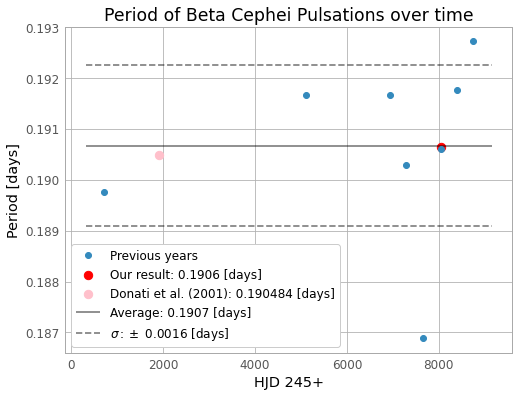

In [148]:
avgper = np.mean(per_manyyears) 
stdper = np.std(per_manyyears) 
print(avgper,stdper)


plt.plot(HJD_manyyears[:-1] -2450000 , per_manyyears[:-1],'o',label='Previous years')
l = plt.xlim()[0]
r = plt.xlim()[1]

plt.scatter( np.mean(HJD)-2450000 , (2*np.pi)*(p3_O2), color='red', label='Our result: {:.4f} [days]'.format( (2*np.pi)*(p3_O2)), s=70 )
plt.scatter(2451911.27699-2450000,0.190484,label='Donati et al. (2001): {} [days]'.format(0.190484),color='pink', s=70)

plt.hlines(avgper, l ,r,label='Average: {:.4f} [days]'.format(avgper),alpha=0.5)
plt.hlines(avgper-stdper, l ,r,linestyle='--',label='$ \sigma: \pm$ {:.4f} [days]'.format(stdper),alpha=0.5)
plt.hlines(avgper+stdper, l ,r,linestyle='--',alpha=0.5)


plt.xlabel('HJD 245+')
plt.ylabel('Period [days]')
plt.title('Period of Beta Cephei Pulsations over time')


plt.grid(True)
plt.legend(framealpha=1)

#plt.savefig('period v time.png',dpi=350)

# Amplitude Over Time

In [137]:
amp_manyyears = [amp_1997, amp_2009, amp_2014,amp_2015,abs(amp_2016),amp_2017,amp_2018,amp_2019, p1_O2] 

In [149]:
HJD_manyyears

array([2450715.8353735292, 2455101.849708182, 2456927.858976,
       2457294.8248333335, 2457649.291621, 2458054.80635424,
       2458390.796972956, 2458747.801044378,
       HJD    2.458055e+06
dtype: float64], dtype=object)

17.911644795741065 1.8902726751830528


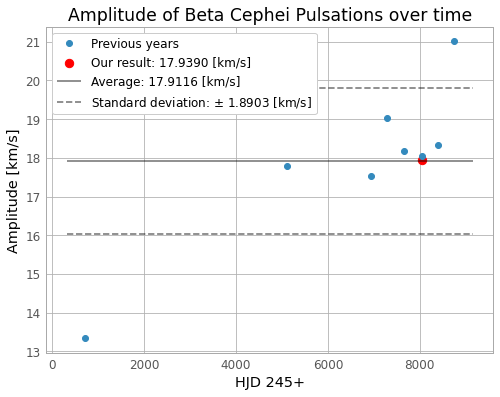

In [147]:
avgamp = np.mean(amp_manyyears) 
stdamp = np.std(amp_manyyears)  
print(avgamp, stdamp)

plt.plot(HJD_manyyears[:-1] -2450000 , amp_manyyears[:-1],'o',label='Previous years')
l = plt.xlim()[0]
r = plt.xlim()[1]

plt.scatter( np.mean(HJD)-2450000 , p1_O2 , color='red', label='Our result: {:.4f} [km/s]'.format(p1_O2),s=70 )


plt.hlines(avgamp, l,r,label='Average: {:.4f} [km/s]'.format(avgamp),alpha=0.5)
plt.hlines(avgamp-stdamp, l,r,linestyle='--',label='Standard deviation: $\pm$ {:.4f} [km/s]'.format(stdamp),alpha=0.5)
plt.hlines(avgamp+stdamp, l,r,linestyle='--',alpha=0.5)


plt.xlabel('HJD 245+')
plt.ylabel('Amplitude [km/s]')
plt.title('Amplitude of Beta Cephei Pulsations over time')


plt.grid(True)
plt.legend(framealpha=1)

plt.savefig('amplitude v time.png',dpi=350)

# Equivalent Width and Light Curves

In [37]:
eqwdat = pd.read_csv('/Users/jennifer/Desktop/School/Year 4/Astro 329/Lab 5/eqw.txt',sep=' ')
eqw = eqwdat['NPIX']*(1-eqwdat['MEAN'])*(0.15) #eqw in angstroms

In [38]:
popt, pcov = curve_fit(orbit, times, eqw, p0=(18.1,0.2,0.03,-2.5))
p1_eqw = popt[0] #Amplitude
p2_eqw = popt[1] # phase
p3_eqw = popt[2] # Gives period 
p4_eqw = popt[3] # zero point 

xx=np.linspace(0.55, 1., 256, endpoint=True)
c_eqw = p1_eqw*np.sin((xx-p2_eqw)/p3_eqw)+p4_eqw

residuals_Ha_both = ( eqw) - orbit(times,p1_eqw,p2_eqw,p3_eqw,p4_eqw)
n=15
fres_eqw = math.sqrt(sum(residuals_both**2)/n)

print("Amplitude =", '%.5f' % p1_eqw, "km/s")
print("Phase =", '%.4f' % p2_eqw, "days")
print("Zero Point =", '%.2f' % p4_eqw, "km/s")
print("Period = {:.6f} days".format( (2*np.pi)*(p3_eqw)  ))
print("Residual", '%.5f' % fres_eqw, "km/s")

Amplitude = 0.00271 km/s
Phase = 0.3178 days
Zero Point = 0.71 km/s
Period = 0.150522 days
Residual 0.48423 km/s


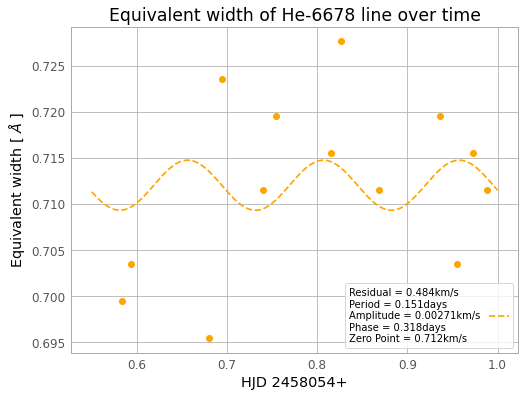

In [45]:
clr = 'orange'
plt.plot(times, eqw ,'o',color=clr)

plt.plot(xx,c_eqw,'--',color=clr,label = 'Residual = {}km/s\nPeriod = {}days\nAmplitude = {}km/s\n\
Phase = {}days\nZero Point = {}km/s'.format(round(fres_eqw,3),round( (2*np.pi)*(p3_eqw),3),round(p1_eqw,5),\
                                              round(p2_eqw,3),round(p4_eqw,3)))

plt.xlabel('HJD 2458054+')
plt.ylabel('Equivalent width [ $\AA$ ]')
plt.title('Equivalent width of He-6678 line over time')
plt.grid(True)
# plt.axis([0.615, 0.98, 0.4, 0.8])
plt.legend(fontsize = 10,markerfirst = False,framealpha = 0.8)


#plt.savefig('equivwidth.png',dpi=350)